In [10]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [11]:
df = pd.read_csv('train.csv')
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X = pd.get_dummies(X)

In [13]:
X_train.shape

(1139, 47)

In [12]:
# Preprocessing X 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# le = LabelEncoder()
# X.loc[:, "Department"] = le.fit_transform(X.loc[:, "Department"])
# X.BusinessTravel = le.fit_transform(X.BusinessTravel)
# X.EducationField = le.fit_transform(X.EducationField)
# X.Gender = le.fit_transform(X.Gender)
# X.JobRole = le.fit_transform(X.JobRole)
# X.MaritalStatus = le.fit_transform(X.MaritalStatus)
# X.OverTime = le.fit_transform(X.OverTime)
# #X.drop(X.loc[:, X.dtypes == 'object'], axis=1)
# #X.loc[:, X.dtypes == 'object'].apply(le.fit_transform)
X = X.drop(['Id', 'Behaviour'], axis=1)
X =  pd.get_dummies(X)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

# Importing and Preprocessing X_test
Xtest = pd.read_csv("test.csv")
le = LabelEncoder()

# Xtest.loc[:, "Department"] = le.fit_transform(Xtest.loc[:, "Department"])
# Xtest.BusinessTravel = le.fit_transform(Xtest.BusinessTravel)
# Xtest.EducationField = le.fit_transform(Xtest.EducationField)
# Xtest.Gender = le.fit_transform(Xtest.Gender)
# Xtest.JobRole = le.fit_transform(Xtest.JobRole)
# Xtest.MaritalStatus = le.fit_transform(Xtest.MaritalStatus)
# Xtest.OverTime = le.fit_transform(Xtest.OverTime)
Xtest = pd.get_dummies(Xtest)
Xtest = Xtest.drop(["Id", "Behaviour"], axis=1)
X_test = sc_X.transform(Xtest)

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.3)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.3)

ValueError: Found input variables with inconsistent numbers of samples: [1139, 1628]

### Logistic Regression

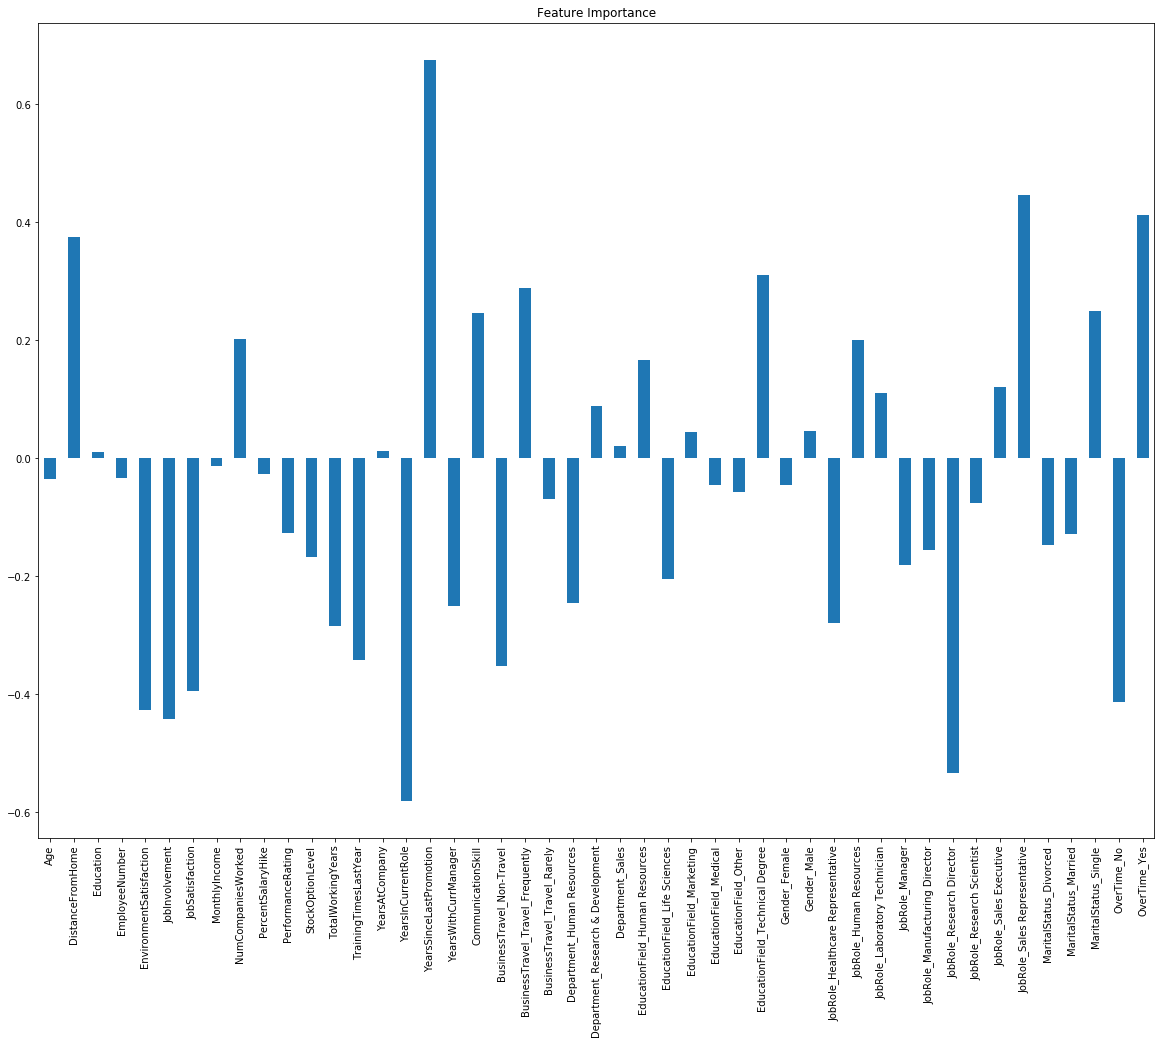

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.23357214, max_iter=200)
classifier.fit(X_train, y_train)

# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(classifier.coef_[0])))
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20, 15));

y_probs = classifier.predict_proba(X_valid)[:, 1]

In [16]:
grid = {"C": np.logspace(-4,4,20), 
        "max_iter": [100, 1000, 2500, 5000],
        "solver": ['liblinear', 'lbfgs', 'sag', 'saga'],
        "penalty": ['l1', 'l2', 'elasticnet', 'none']
       }# l1 lasso l2 ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10, verbose=True, n_jobs=-1)
logreg_cv.fit(X_train, y)

ValueError: Found input variables with inconsistent numbers of samples: [1139, 1628]

In [17]:
logreg_cv.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [18]:
classifier = LogisticRegression(C=0.23357214,  class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False)

classifier.fit(X_train, y_train)
y_probs = classifier.predict_proba(X_train)[:, 1]

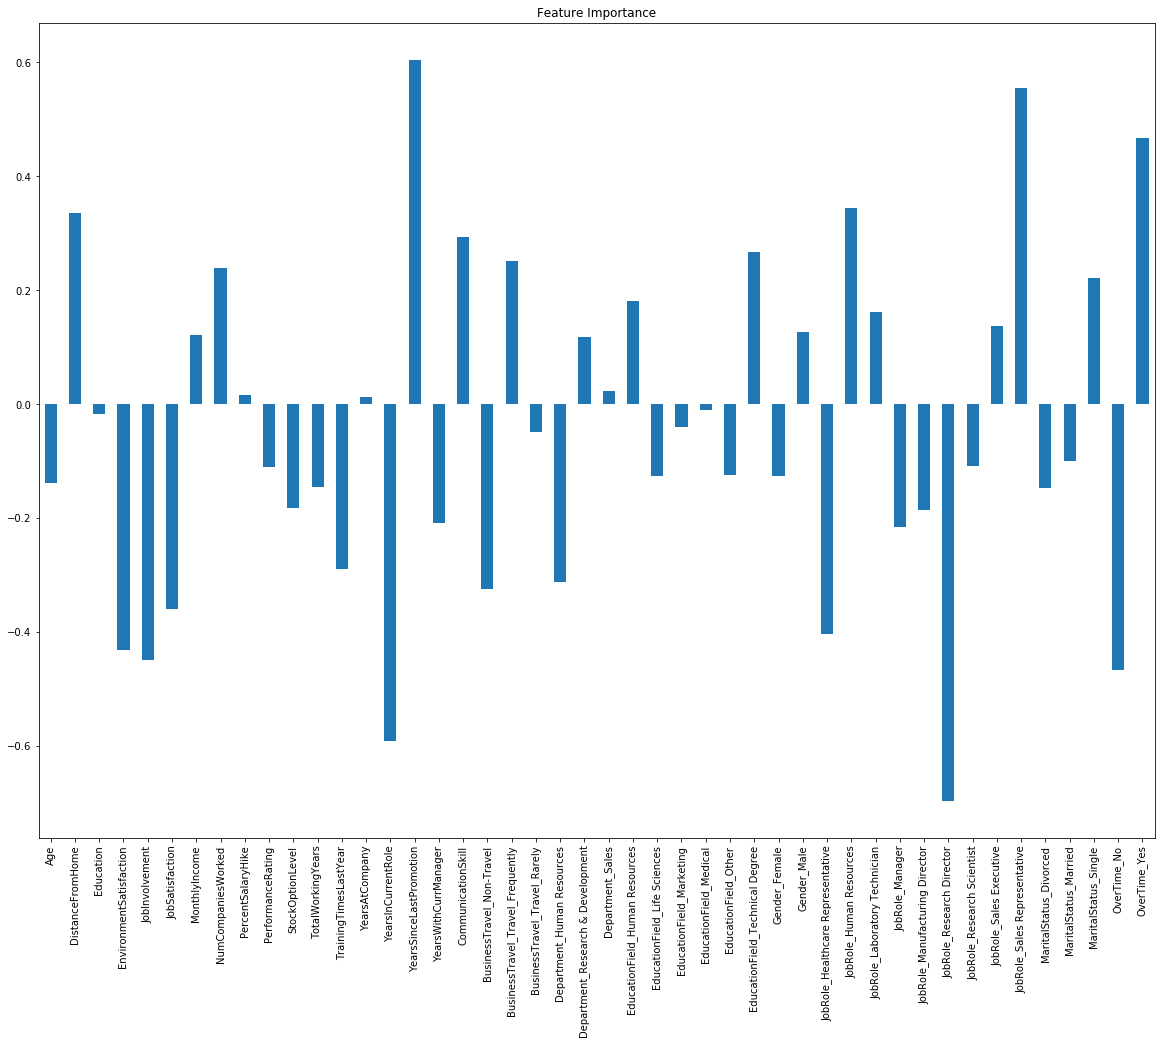

In [190]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(classifier.coef_[0])))
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20, 15));

## KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 150, p = 2, metric='minkowski', weights='distance')
classifier.fit(X_train, y)

y_probs = classifier.predict_proba(X_train)[:,1]

In [127]:
y_probs

array([0., 0., 1., ..., 1., 1., 1.])

## SVM

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_valid = kpca.transform(X_valid)
X_test = kpca.transform(X_test)

In [20]:
classifier = SVC(kernel='rbf', probability=True, C=1).fit(X_train, y_train)
y_probs = classifier.predict_proba(X_test)[:, 1]

In [27]:
y_probs.shape

(1139,)

In [21]:
## Using Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
gs_clf = GridSearchCV(classifier, param_grid, cv = 5, verbose = 2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   3.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   4.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   4.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   4.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   4.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   4.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   5.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   3.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   3.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   4.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   4.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   4.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   4.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  9.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [22]:
# Best parameters after tuning
gs_clf.best_params_
#y_probs = gs_clf.predict_proba(X_test)[:, 1]
#y_probs

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

## Naive bayes

In [62]:
# Fitting Classifier to the Training set   78% auc_roc
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y)
y_probs = classifier.predict_proba(X_train)[:, 1]

## Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y)
y_probs = classifier.predict_proba(X_train)[:, 1]

## Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 800, criterion = 'entropy')
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)
classifier.fit(X_train, y_train)
y_probs = classifier.predict_proba(X_test)[:, 1]
y_probs[:10]

array([0.99375, 0.075  , 0.99   , 0.10875, 0.92   , 0.13625, 0.18875,
       0.16   , 0.335  , 0.22625])

## Decision Tree Regressor

In [181]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="mse")
reg.fit(X_train, y)
y_probs = reg.predict(X_train)

In [183]:
y_probs

array([0., 0., 1., ..., 1., 1., 1.])

## SVR

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y)
y_probs = regressor.predict(X_test)

## Multiple Linear regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)
reg = LinearRegression()

reg.fit(X_train, y)
y_probs = reg.predict(X_train)

# Evaluating Classification model

### Train set 

1.0


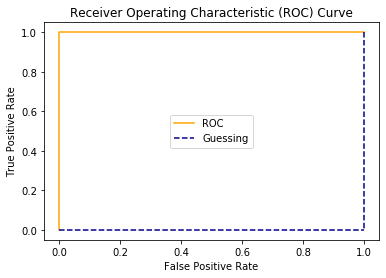

CrossValidated Score:  0.9903476804885256
588   0   0   551
Accuracy:  1.0
Precision:  1.0
Recall: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00       551

    accuracy                           1.00      1139
   macro avg       1.00      1.00      1.00      1139
weighted avg       1.00      1.00      1.00      1139



In [174]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_probs.flatten())

print(roc_auc_score(y_train, y_probs))

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 0], color='darkblue', linestyle='--', label='Guessing')
    plt.plot([1, 1], [1, 0], color='darkblue', linestyle='--')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

print("CrossValidated Score: ", cross_val_score(classifier, X_train, y_train, cv=8).mean())

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = (y_probs.flatten() > .5)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print(tn, " ", fp, " ", fn, " ", tp)
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall:", tp/(tp+fn))
print(classification_report(y_train, y_pred))

### Validation set

0.9647115964359885


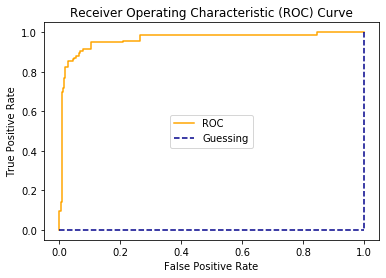

CrossValidated Score:  0.8999064315965724
230   23   20   216
Accuracy:  0.9120654396728016
Precision:  0.9037656903765691
Recall: 0.9152542372881356
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       253
           1       0.90      0.92      0.91       236

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489



In [252]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs.flatten())

print(roc_auc_score(y_valid, y_probs))

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 0], color='darkblue', linestyle='--', label='Guessing')
    plt.plot([1, 1], [1, 0], color='darkblue', linestyle='--')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

print("CrossValidated Score: ", cross_val_score(classifier, X_train, y_train, cv=8).mean())

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = (y_probs.flatten() > .5)
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
print(tn, " ", fp, " ", fn, " ", tp)
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall:", tp/(tp+fn))
print(classification_report(y_valid, y_pred))

# BESTEST rank 40
## SVC(kernel='rbf', probability=True, C=1).fit(X_train, y_train) on validation set

auc_score : 0.945894270763451

CrossValidated Score:  0.8938121737417513

tn, fp, fn, tp = 228, 29, 20, 212

Accuracy:  0.8997955010224948

Precision:  0.8796680497925311

Recall: 0.9137931034482759

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       257
           
           1       0.88      0.91      0.90       232

    accuracy                           0.90       489
   
   macro avg       0.90      0.90      0.90       489

weighted avg       0.90      0.90      0.90       489

### Logistic best Score
0.8851916494775257


682   161   155   630
Accuracy:  0.8058968058968059
Precision:  0.7964601769911505
Recall: 0.802547770700637
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       843
           1       0.80      0.80      0.80       785

    accuracy                           0.81      1628
   macro avg       0.81      0.81      0.81      1628
weighted avg       0.81      0.81      0.81      1628

### SVM Best SCORE using get_dummies, 
auc_roc_score: 0.9939554669024034

* tn, fp, fn, tp = 816   27   15   770
* Accuracy:  0.9742014742014742
* Precision:  0.9661229611041405
* Recall: 0.9808917197452229

              precision    recall  f1-score   support

           
           0       0.98      0.97      0.97       843
           
           1       0.97      0.98      0.97       785

    accuracy                           0.97      1628
   
   macro avg       0.97      0.97      0.97      1628

weighted avg       0.97      0.97      0.97      1628

#### SVM best SCORE:  SVC(kernel='rbf', random_state=0, probability=True)
roc_auc_score :0.9928825622775801

CrossValidated Score:  0.9133784701999612
* tn, fp, fn, tp = 802,  41,  25,  760
* Accuracy:  0.9594594594594594
* Precision:  0.9488139825218477
* Recall : 0.9681528662420382

## Results into csv

In [139]:
submission =1

In [254]:
# Turning results into csv file
#print("Submission no. : ", submission)
data = {"Id": pd.read_csv("test.csv")["Id"],
        "Attrition": y_probs.flatten()}
predictions = pd.DataFrame(data, columns = ["Id", "Attrition"]).to_csv(f"Submissions/Submission.csv", index=False)
#submission+=1

With Employeenumber included, labelEncoding, standardScaling in SVM Kernel: - 85% score

In [123]:
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20, 30], 
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv=5,
                            verbose=2)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.4s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=None, max_f

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_sam

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed: 30.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [124]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [25]:
# Using ANN
# Importing the Keras libraries and packages
import keras 
from keras.models import Sequential # Initialise neural network
from keras.layers import Dense # Used to create layers in ANN

# Initialising the ANN
classifier = Sequential() # Main structure

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46)) # Adding sections/parts to the main structure

# Adding the second hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the sixth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y, batch_size = 10, epochs = 100)

Using TensorFlow backend.
C:\Users\jeeva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jeeva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jeeva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jeeva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (C:\Users\jeeva\anaconda3\lib\site-packages\tensorflow\python\keras\saving\saved_model\__init__.py)

In [26]:
y_probs = classifier.predict(X_train)
y_probs

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [222]:
X_train.shape

(1628, 26)

## Using Different approach

In [36]:
df.BusinessTravel.cat.codes.value_counts()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [125]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [126]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [35]:
y = df.Attrition

AttributeError: 'DataFrame' object has no attribute 'Attrition'

In [34]:
df.drop(["Id", "Attrition", "Behaviour"], axis=1, inplace=True)

In [33]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

ValueError: could not convert string to float: 'Non-Travel'

In [31]:
Xtest = pd.read_csv("test.csv")
for label, content in Xtest.items():
    if pd.api.types.is_string_dtype(content):
        Xtest[label] = content.astype("category").cat.as_ordered()
    if not pd.api.types.is_numeric_dtype(content):
        Xtest[label] = pd.Categorical(content).codes

Xtest = Xtest.drop(["Id", "Behaviour"], axis=1)
X_test = preprocessing.scale(Xtest)

NameError: name 'preprocessing' is not defined

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(df_scaled, y, test_size=.3)
classifier = SVC(kernel='rbf', probability=True, C=1.2).fit(X_train, y_train)
y_probs = classifier.predict_proba(X_valid)[:, 1]
y_probs.shape

NameError: name 'df_scaled' is not defined